### Датасет для анализа: https://www.kaggle.com/gregorut/videogamesales

Fields include

    Rank - Ranking of overall sales

    Name - The games name

    Platform - Platform of the games release (i.e. PC,PS4, etc.)

    Year - Year of the game's release

    Genre - Genre of the game

    Publisher - Publisher of the game

    NA_Sales - Sales in North America (in millions)

    EU_Sales - Sales in Europe (in millions)

    JP_Sales - Sales in Japan (in millions)

    Other_Sales - Sales in the rest of the world (in millions)

    Global_Sales - Total worldwide sales.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('vgsales.csv.zip', compression='zip')

In [3]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


Датасет содержит отсутствующие значения, при возможности замены произведём её

In [5]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [6]:
df[pd.isnull(df['Year']) | pd.isnull(df['Publisher'])]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...,...
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01
16493,16496,The Smurfs,3DS,NaN,Action,Unknown,0.00,0.01,0.00,0.00,0.01
16494,16497,Legends of Oz: Dorothy's Return,3DS,2014.0,Puzzle,NaN,0.00,0.01,0.00,0.00,0.01
16543,16546,Driving Simulator 2011,PC,2011.0,Racing,NaN,0.00,0.01,0.00,0.00,0.01


У нас имеются отсутствующие значения в столбцах с годом выхода игры и издателем игры, при этом мы видим, что по некоторым играм издателем указано 'Unknown', скорее всего информация не указана по проектам небольших студий (в датасете игры расположены в порядке убывания количества продаж, самое высоке место игры с пропущенным издателем - 471, продажи составляют 3 млн копий), поэтому присвоим значение 'Unknown' подобным издателям

In [7]:
df.Publisher = df.Publisher.fillna('Unknown')

In [8]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher         0
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [9]:
print('Суммарные продажи игр с неизвестным годом релиза',\
      df[pd.isnull(df['Year'])].Global_Sales.sum().round(4))
print('Доля продаж игр с неизвестным годом релиза в общем объеме продаж',\
      (df[pd.isnull(df['Year'])].Global_Sales.sum() / df.Global_Sales.sum()).round(4))

Суммарные продажи игр с неизвестным годом релиза 100.08
Доля продаж игр с неизвестным годом релиза в общем объеме продаж 0.0112


Попробуем поработать с годом издания игры, можно просто удалить все строки с неизвестным значением, т.к. их небольшое количество (100 миллионов продаж,1% от общего объема), но мы видим, что часть игр в своем названии содержит год выхода (в спортивных симуляторах обычно указывается будущий год, например Madden NFL 2004, самая продаваемая игра с неуказанным годом издания, вышла в 2003 году, а т.к.  большинство игр с годом в названии именно спортивные, то учтем этот факт), также отметим, что датафрейм содержит информацию об играх, выпущенных с 1980 по 2020 год, используем информацию:

In [10]:
new_year = [] # создадим список годов выхода игр для каждого названия из указанной выборки
for name in df[pd.isnull(df['Year'])].Name:
    words = name.split()
    year = np.nan
    for word in words:
        if word.isdigit() and len(word) == 4:
            if 1980 <= int(word) <= 2020:
                year = int(word) - 1
    new_year.append(year)

In [11]:
indexes = df[pd.isnull(df['Year'])].index

In [12]:
df.loc[indexes, 'Year'] = new_year

In [13]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            256
Genre             0
Publisher         0
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [14]:
print('Суммарные продажи игр с неизвестным годом релиза',\
      df[pd.isnull(df['Year'])].Global_Sales.sum().round(4))
print('Доля продаж игр с неизвестным годом релиза в общем объеме продаж',\
      (df[pd.isnull(df['Year'])].Global_Sales.sum() / df.Global_Sales.sum()).round(4))

Суммарные продажи игр с неизвестным годом релиза 84.89
Доля продаж игр с неизвестным годом релиза в общем объеме продаж 0.0095


Мы смогли присвоить дату релиза 15 играм, теперь доля продаж игр с неизвестным годом выхода составляет менее 1%

Проверим датасет на дубликаты, в случае нахождения удалим их

In [15]:
df[df.duplicated(subset = ['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'])]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
14999,15002,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0.0,0.0,0.02,0.0,0.02


In [16]:
df[df.Name == 'Wii de Asobu: Metroid Prime']

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
14997,15000,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0.0,0.0,0.02,0.0,0.02
14999,15002,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0.0,0.0,0.02,0.0,0.02


In [17]:
df = df.drop_duplicates(subset = ['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'])

Рассмотрим объемы продаж по годам

In [18]:
sale_counts = df.groupby('Year').Global_Sales\
                .agg([lambda x: x.mean().round(2), lambda x: x.sum().round(2)])\
                .set_axis(['Средний объем продаж', 'Общий объем продаж'], axis=1).reset_index()

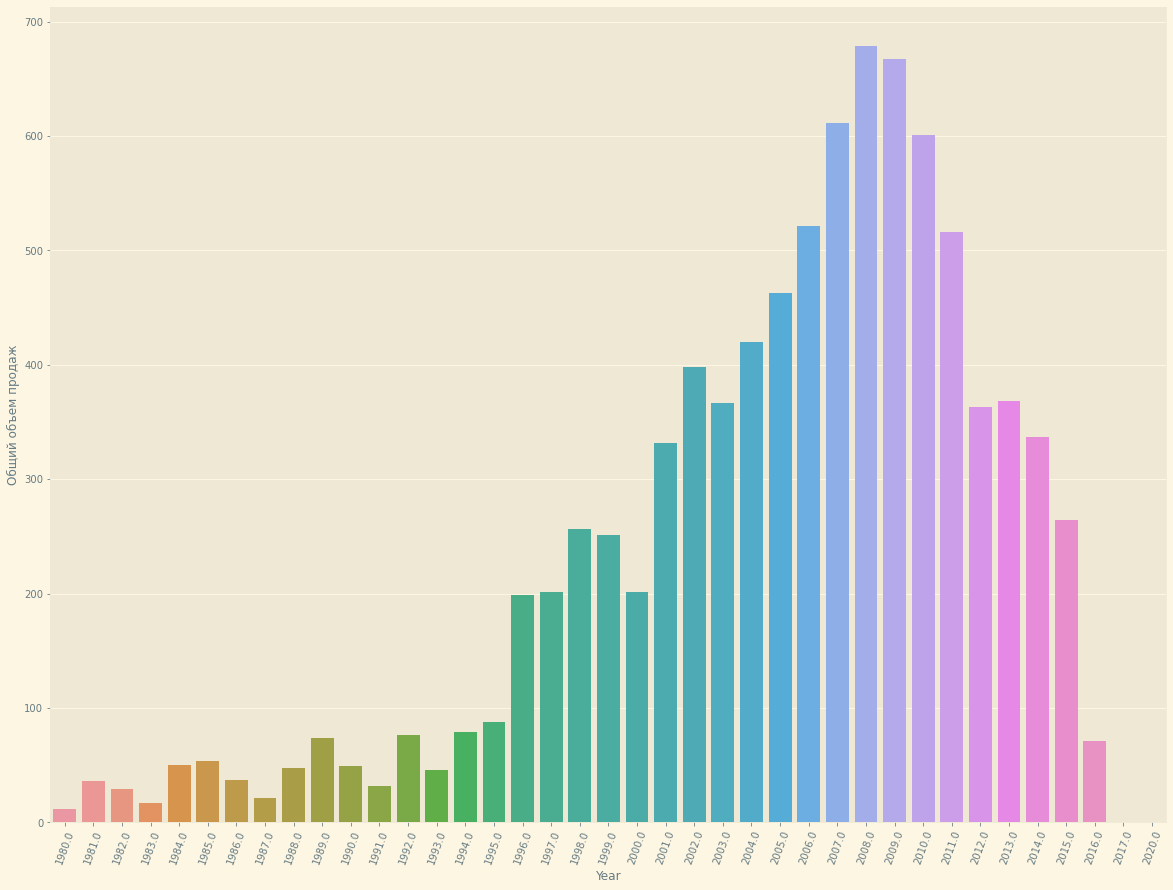

In [19]:
plt.style.use('Solarize_Light2')
plt.figure(figsize=(20, 15))
sns.barplot(x= 'Year', y='Общий объем продаж', data=sale_counts)
plt.xticks(rotation=70)
plt.show()

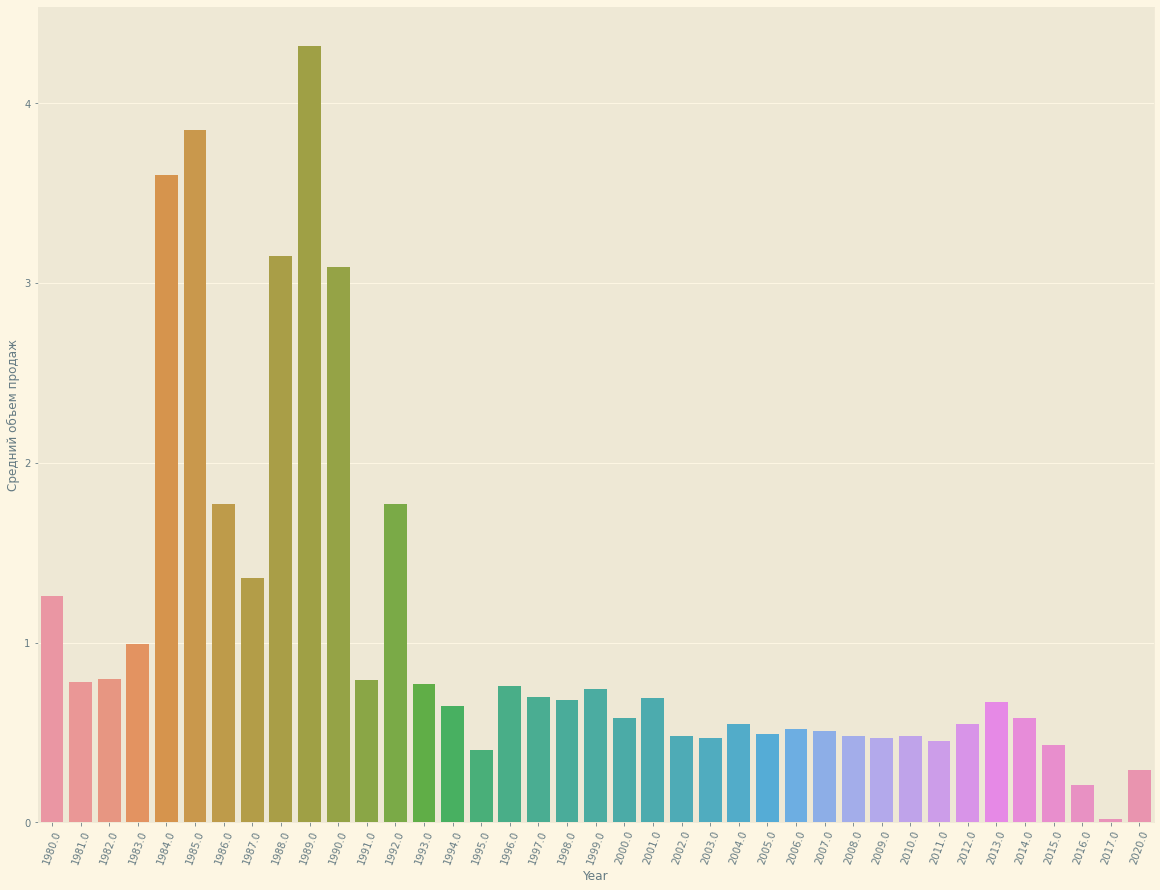

In [20]:

plt.figure(figsize=(20, 15))
sns.barplot(x= 'Year', y='Средний объем продаж', data=sale_counts)
plt.xticks(rotation=70)
plt.show()

Пик выпуска игр приходится на 2008-2009 годы, однако количество игр, в среднем продавыемых за год, максимально в 1980х годах, что можно объяснить тем фактом, что на заре компьютерной эры игр выпусклось мало, разработчиков были единицы, поэтому среднее количество продаж по каждой игре было относительно высоким, в 2000х же годах повсеместная компьютеризация способствовала появлению множества небольших проектов, объемы продаж которых были относительно невелики по сравнению с редкими играми предыдущих лет

Проверим данный тезис и сравним количество разработчиков и игр в периоды 1980-1990 гг и 2000-2010 гг.:

In [21]:
print('Издано игр с 1980 по 1990 гг.:')
print(df[(1980 <= df.Year) & (df.Year <= 1990)].shape[0])
print()
print('Издано игр с 2000 по 2010 гг.:')
print(df[(2000 <= df.Year) & (df.Year <= 2010)].shape[0])

Издано игр с 1980 по 1990 гг.:
221

Издано игр с 2000 по 2010 гг.:
10482


In [22]:
data_80 = df[(1980 <= df.Year) & (df.Year <= 1990)].groupby('Year').Publisher.count().reset_index()

In [23]:
data_00 = df[(2000 <= df.Year) & (df.Year <= 2010)].groupby('Year').Publisher.count().reset_index()

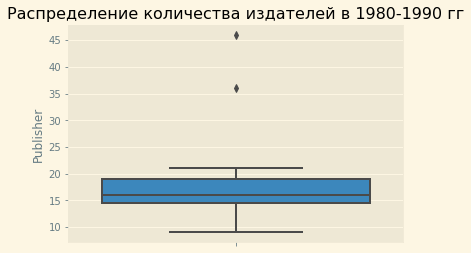

In [24]:
sns.boxplot(y='Publisher', data=data_80)
plt.title("Распределение количества издателей в 1980-1990 гг")
plt.show()

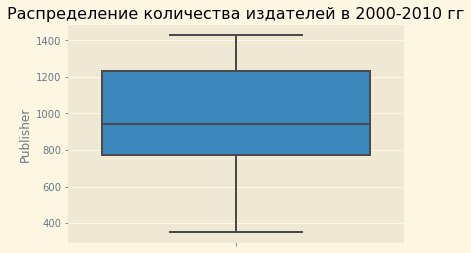

In [25]:
sns.boxplot(y='Publisher', data=data_00)
plt.title("Распределение количества издателей в 2000-2010 гг")
plt.show()

In [26]:
df[(1980 <= df.Year) & (df.Year <= 1990)].describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000
mean,3157.488688,1984.371041,1.181538,0.175701,0.531086,0.038597,1.927466
std,2857.815382,3.141782,3.336240,0.494358,0.916387,0.137733,4.400499
min,2.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.020000
25%,1144.000000,1982.000000,0.220000,0.010000,0.000000,0.000000,0.400000
50%,2145.000000,1984.000000,0.450000,0.030000,0.000000,0.010000,0.970000
75%,4782.000000,1987.000000,0.820000,0.120000,0.780000,0.020000,1.610000
max,15870.000000,1990.000000,29.080000,3.750000,6.810000,1.510000,40.240000


In [27]:
df[(2000 <= df.Year) & (df.Year <= 2010)].describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,10482.000000,10482.00000,10482.000000,10482.000000,10482.000000,10482.000000,10482.00000
mean,8379.098264,2006.07136,0.259658,0.137139,0.054405,0.050237,0.50178
std,4708.271828,2.91181,0.763564,0.527221,0.259764,0.213026,1.55331
min,1.000000,2000.00000,0.000000,0.000000,0.000000,0.000000,0.01000
25%,4357.250000,2004.00000,0.020000,0.000000,0.000000,0.000000,0.06000
50%,8387.500000,2007.00000,0.090000,0.020000,0.000000,0.010000,0.17000
75%,12414.250000,2009.00000,0.250000,0.100000,0.020000,0.030000,0.45000
max,16600.000000,2010.00000,41.490000,29.020000,6.500000,10.570000,82.74000


Количество игр (как и количество разработчиков) в рассматриваемые периоды выросло кратно:

на 221 игру за 1980-1990 годы приходится 16 разработчиков (медиана за период);

на 10482 игры за 2000-2010 годы приходится 943 разработчиков (медиана за период).

Также стоит отметить, что в период 1980-1990 гг в среднем на одну игру приходилось чуть менее 2 млн продаж, за 2000-2010 только 0.5 млн (снижение в 4 раза), медианное значение при этом снизилось почти в 6 раз (с 0.97 млн до 0.17 млн копий)

Узнаем какие жанры игр наиболее популярны среди разработчиков

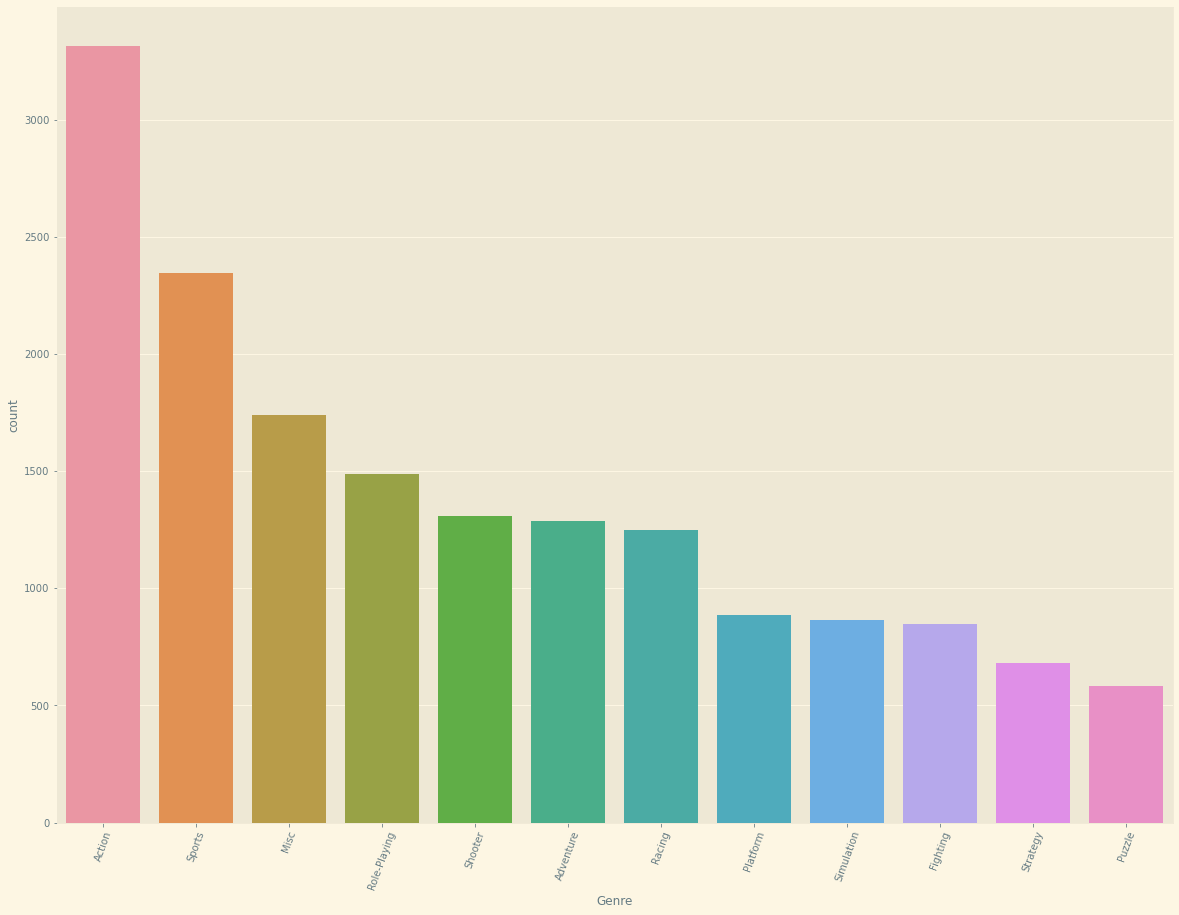

In [28]:
plt.figure(figsize=(20, 15))
sns.countplot(x="Genre", data=df, order = df['Genre'].value_counts().index)
plt.xticks(rotation=70)
plt.show()

Самыми популярными жанрами являются action и sports, а наименее популярными strategy и puzzle, давайте проверим, всегда ли первые 2 жанра опережали последние


In [29]:
df_genre = df[df['Genre'].isin(['Action', 'Sports', 'Strategy', 'Puzzle'])]\
            .groupby(['Year', 'Genre'], as_index=False).Name.count()\
            .set_axis(['Year', 'Genre', 'Quantity'], axis=1)

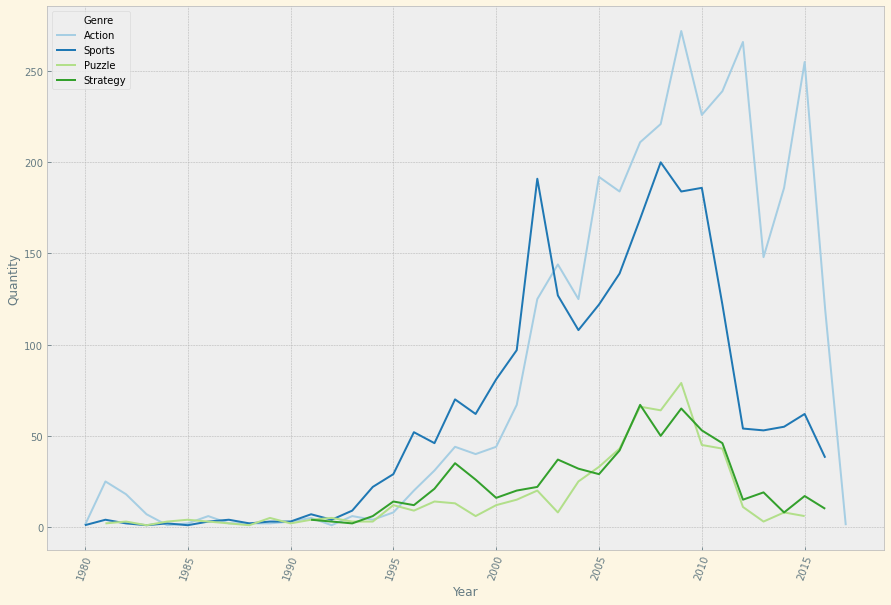

In [30]:
plt.figure(figsize=(15, 10))
plt.style.use('bmh')
sns.lineplot(x="Year", y="Quantity",
             hue="Genre",
             data=df_genre,
            palette='Paired')
plt.legend(loc='upper left')
plt.xticks(rotation=70)
plt.show()


До 1983 годы action-игры выпускались заметно чаще других

В период 1984-1992 количество игр рассматриваемых жанров находилось примерно на одном невысоком уровне (Strategy появлились только в 1991 году)

С 1993 по 2002 на рынке доминировали спортивные игры, после же этого периода экшн-игры не уступали лидирующих позиций, спортивные же симуляторы после 2010 года опустились практически до уровня продаж стратегий и головоломок

В отдельные годы (1985, 1992) игр жанра puzzle было выпущено на рынок больше всего, но данный факт не имеет тенденции к повторению, стратегии же никогда небыли лидерами рынка

Построим тепловую карту распределения продаж по жанрам и регионам:


In [31]:
compare_df = df[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]

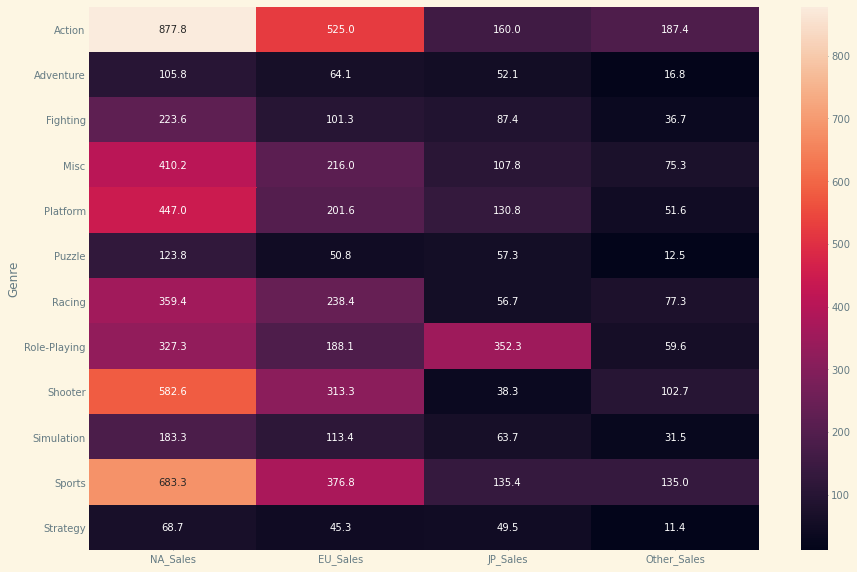

In [32]:
plt.figure(figsize=(15, 10))
sns.heatmap(compare_df.groupby('Genre').sum(), annot=True, fmt = '.1f')
plt.show()

Распределение продаж по Северной Америке, Европе и иным странам (Others) в целом схоже с распределением популярности игр среди разработчиков, чаще всего покупают  Action и Sports, реже - Strategy, Puzzle и Adventure. В Японии самым популярным жанром с большим отрывом является RPG, реже всего покупают шутеры, оба показателя выбиваются из общемировой тенденции. Таким образом, можно сделать вывод, что предпочтения японцев серьезно отличаются от остального мира

Также стоит отметить, что игры жанра Adventure разрабатываются довольно часто (6 место из 12, средние показатели по объемам разработки), однако тепловая карта говорит нам о том, что Adventure-игры приобретаются крайне редко для таких объемов выпуска (на уровне самых непопулярных стратегий и головоломок), что может быть сигналом для потенциальных инвесторов

Какие игры самые популярные в своих жанрах? Выведем топ-3 игры в каждом и сравним уровень их продаж

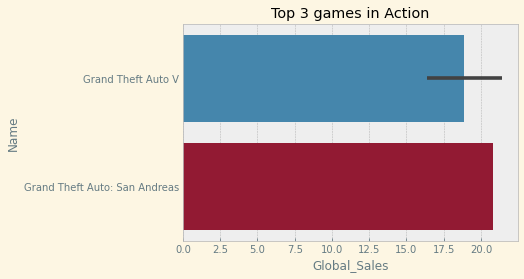

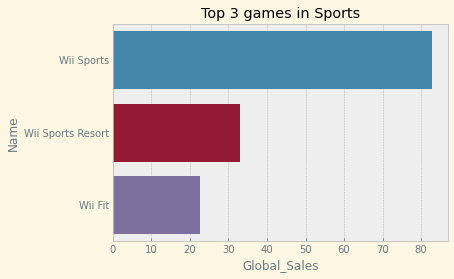

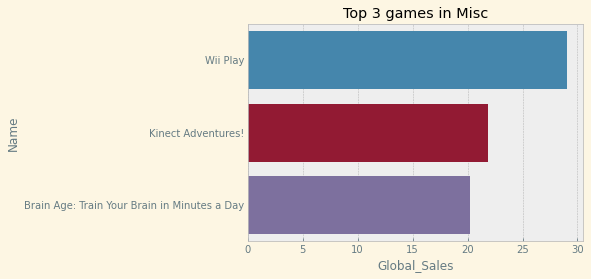

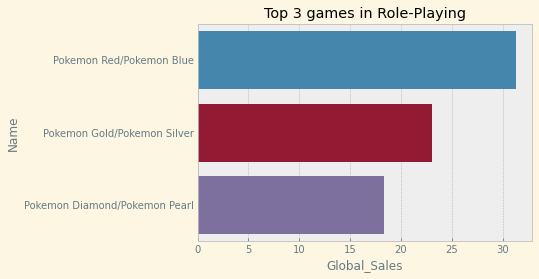

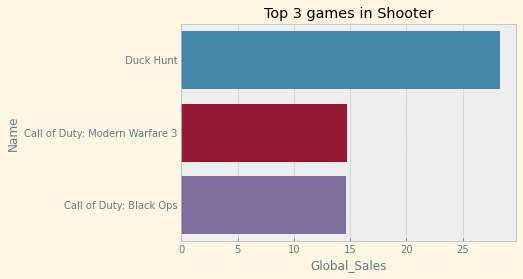

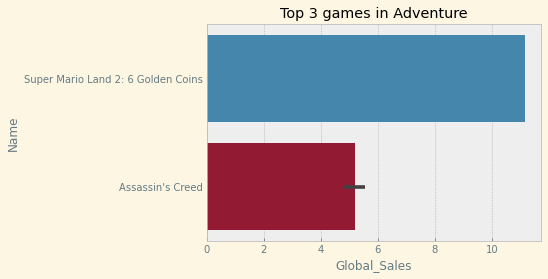

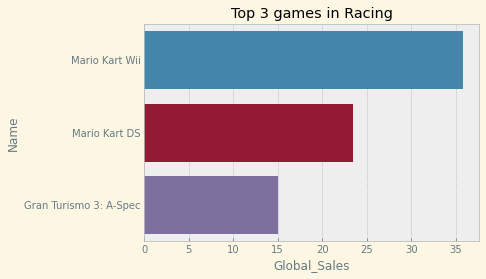

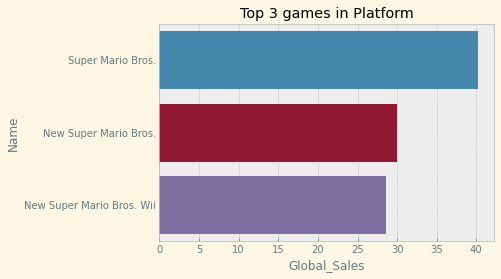

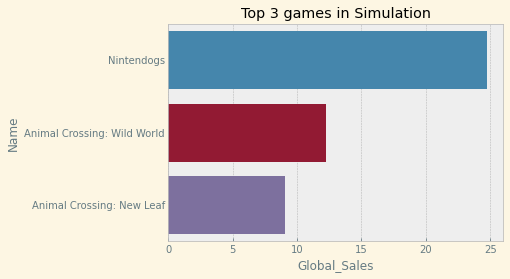

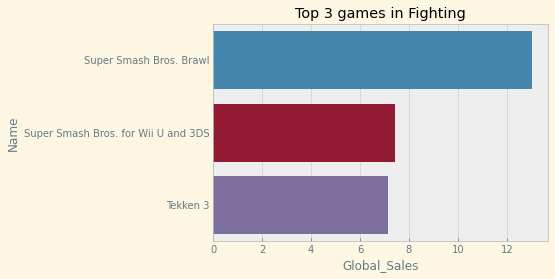

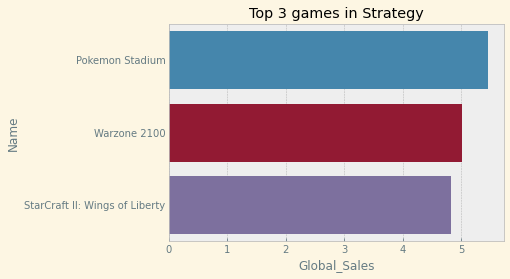

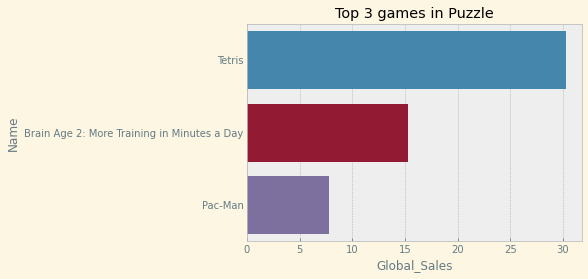

In [33]:
for genre in df['Genre'].value_counts().index:
    genre_df = df[df['Genre']==genre].sort_values('Global_Sales', ascending=False).head(3)
    plt.figure()
    sns.barplot(data=genre_df, x='Global_Sales', y='Name')
    plt.title('Top 3 games in {}'.format(genre))
    plt.show()

В двух категориях (экшн и приключения) на графике отображены только 2 игры, т.к. GTA 5 и Assassin's Creed отражены в данных дважды по продажам на разных платформах

Из самых популярных игр в своем жанре выделяется Wii Sports, т.к. опережает по продажам ближайшую игу в своем классе более чем в 2 раза, что, в целом, несвойственно иным видам игр

Самым непопулярным жанром является Puzzle, но главный представитель жанра (Тетрис) имеет показатель продаж на уровне или выше более популярных видов игр (Action, Misc, Shooter, Simulation, Fighting), а представителей стратегий, которые по популярности находятся на уровне головоломок, опережает в 5-6 раз. Можно сказать, что качественно сделанная игра вне зависимости от жанра способна стать мировым хитом

Рассмотрим распределение игр по платформам и наиболее популярным разработчикам

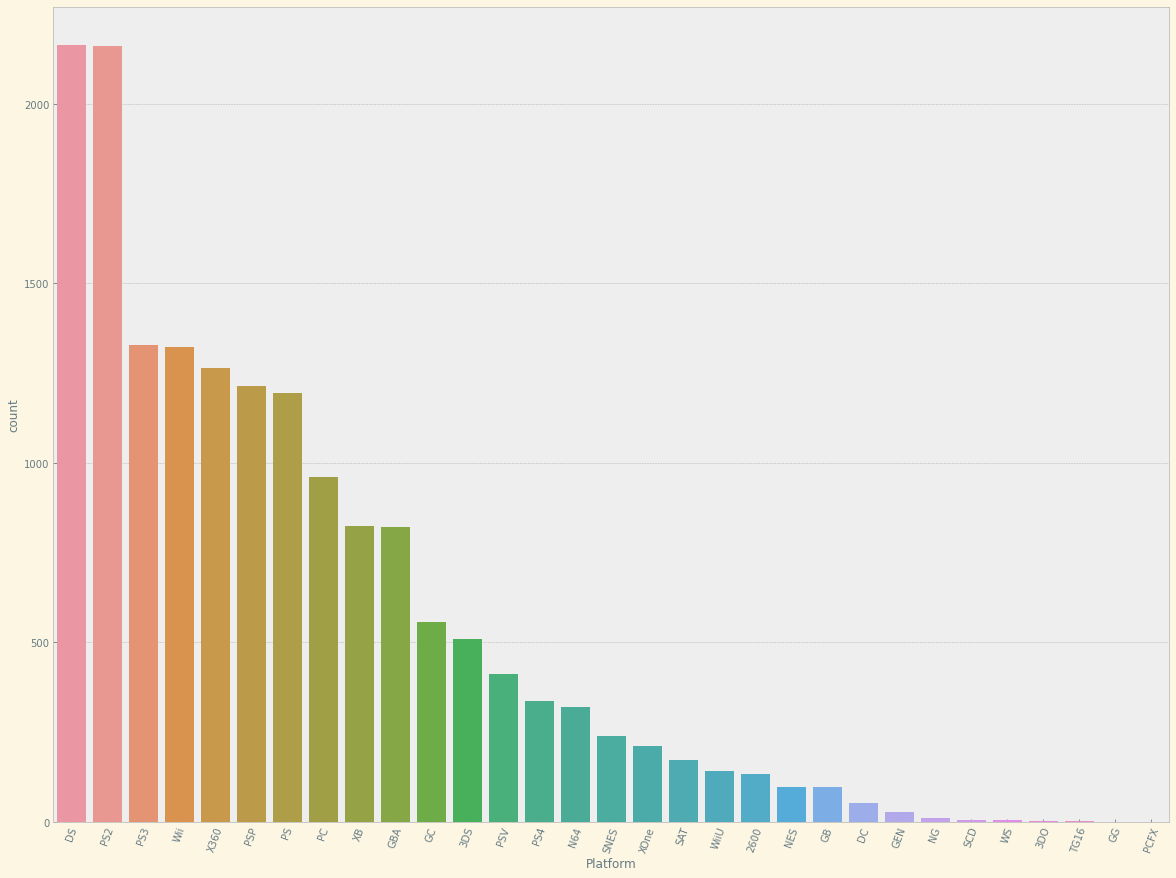

In [34]:
plt.figure(figsize=(20, 15))
sns.countplot(x="Platform", data=df, order = df['Platform'].value_counts().index)
plt.xticks(rotation=70)
plt.show()

In [35]:
df_agg = df.groupby(['Platform', 'Publisher'])\
    .agg({'Global_Sales': 'count'})

In [36]:
g = df_agg['Global_Sales'].groupby(level=0, group_keys=False)

In [37]:
res = g.apply(lambda x: x.sort_values(ascending=False).head(1))
res.nlargest(10)

Platform  Publisher                  
PS2       Sony Computer Entertainment    204
PS        Sony Computer Entertainment    188
DS        Ubisoft                        181
X360      Electronic Arts                167
PC        Electronic Arts                148
PS3       Electronic Arts                142
XB        Electronic Arts                123
PSP       Namco Bandai Games             121
Wii       Ubisoft                        115
GBA       THQ                            110
Name: Global_Sales, dtype: int64

Наиболее популярной платформой для разработки является Нинтендо (DS) и PS2, из 10 наиболее популярных платформ на 4 чаще всего игры разрабатывает Electronic Arts, лидерами на 2х платформах являются Sony и Ubisoft

Сравним количество игр самых популярных разработчиков с количеством продаж этих игр

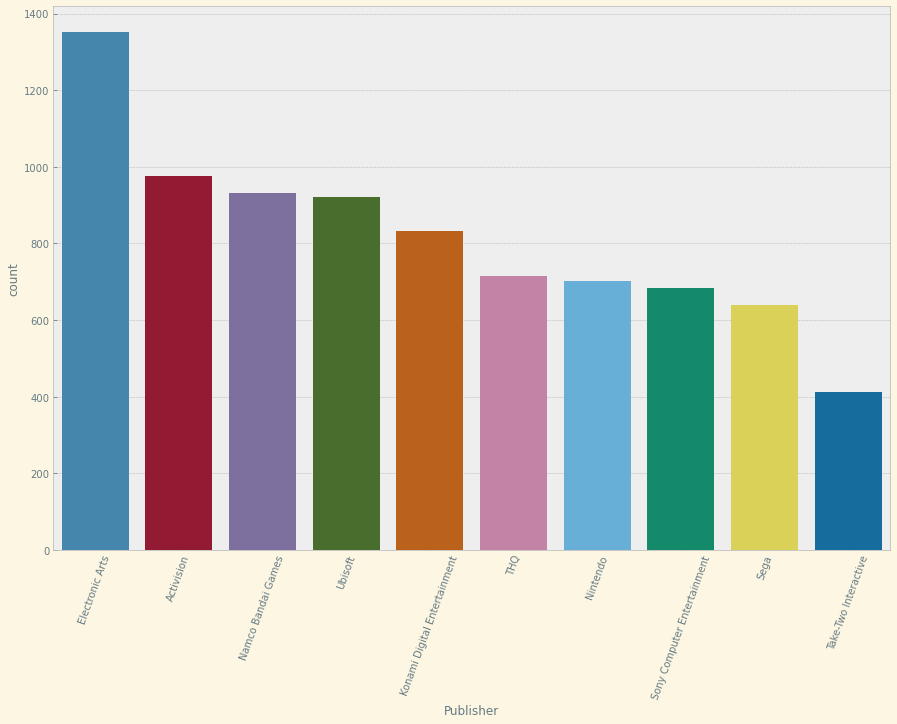

In [38]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Publisher", data=df, order = df['Publisher'].value_counts().head(10).index)
plt.xticks(rotation=70)
plt.show()

In [39]:
publishers = df.groupby('Publisher', as_index=False).Global_Sales.sum().sort_values('Global_Sales', ascending=False).head(10)

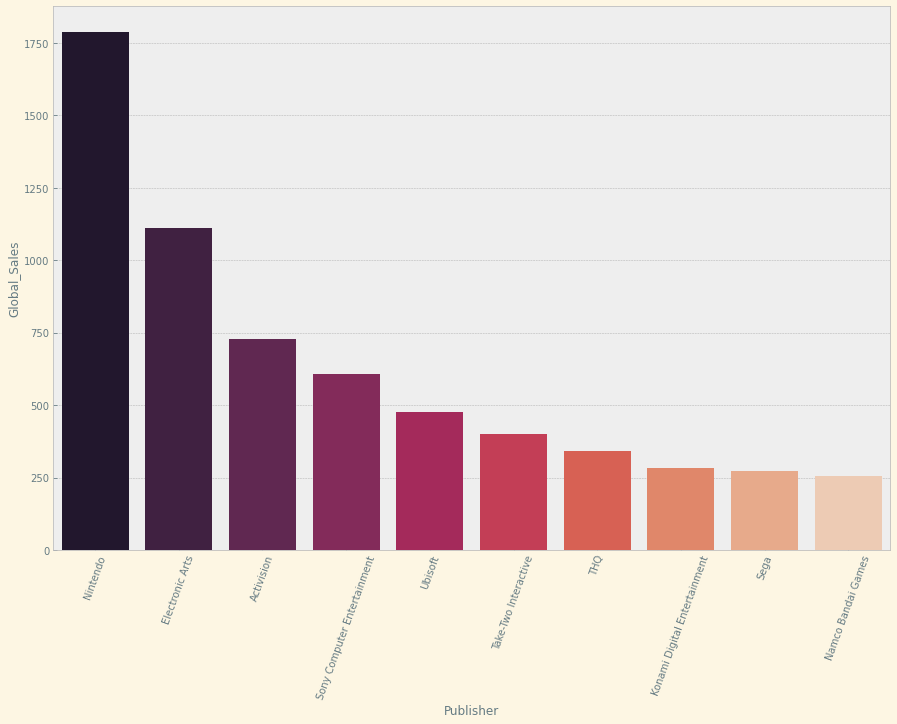

In [40]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Publisher', y='Global_Sales', palette="rocket", data=publishers)
plt.xticks(rotation=70)
plt.show()

Несмотря на то, что Nintendo всего на 7 месте по количеству созданных игр, они продали больше всего копий своих творений

По такому же принципу можно выделить Take-Two и Sony, находящиеся на 10 и 8 местах соответственно в первом рейтинге и на 6 и 4 во втором, продажи в данном случае важнее объемов производства

Попробуем отразить эту зависимость на графике

In [41]:
publishers_2 = df.groupby('Publisher', as_index=False)\
        .agg({'Global_Sales':'sum', 'Name': 'count'})\
        .sort_values('Global_Sales', ascending=False)\
        .set_axis(['Publisher', 'Global_Sales', 'Count_of_games'], axis=1)\
        .head(10)

In [42]:
publishers_2['Sales_per_game'] = (publishers_2['Global_Sales'] / publishers_2['Count_of_games']).round(2)
publishers_2

,Publisher,Global_Sales,Count_of_games,Sales_per_game
359,Nintendo,1786.54,702,2.54
138,Electronic Arts,1110.32,1351,0.82
21,Activision,727.46,975,0.75
456,Sony Computer Entertainment,607.50,683,0.89
525,Ubisoft,474.72,921,0.52
494,Take-Two Interactive,399.54,413,0.97
488,THQ,340.77,715,0.48
275,Konami Digital Entertainment,283.64,832,0.34
446,Sega,272.99,639,0.43
347,Namco Bandai Games,254.09,932,0.27


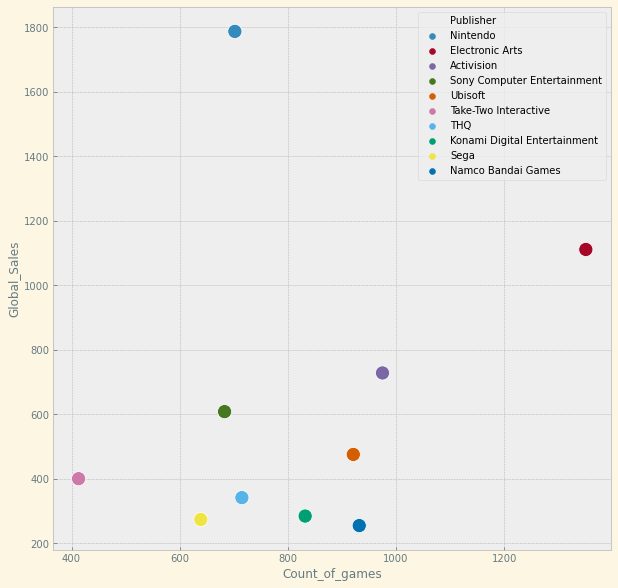

In [43]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x="Count_of_games", y="Global_Sales",
                hue="Publisher", s=200, data=publishers_2)
plt.show()

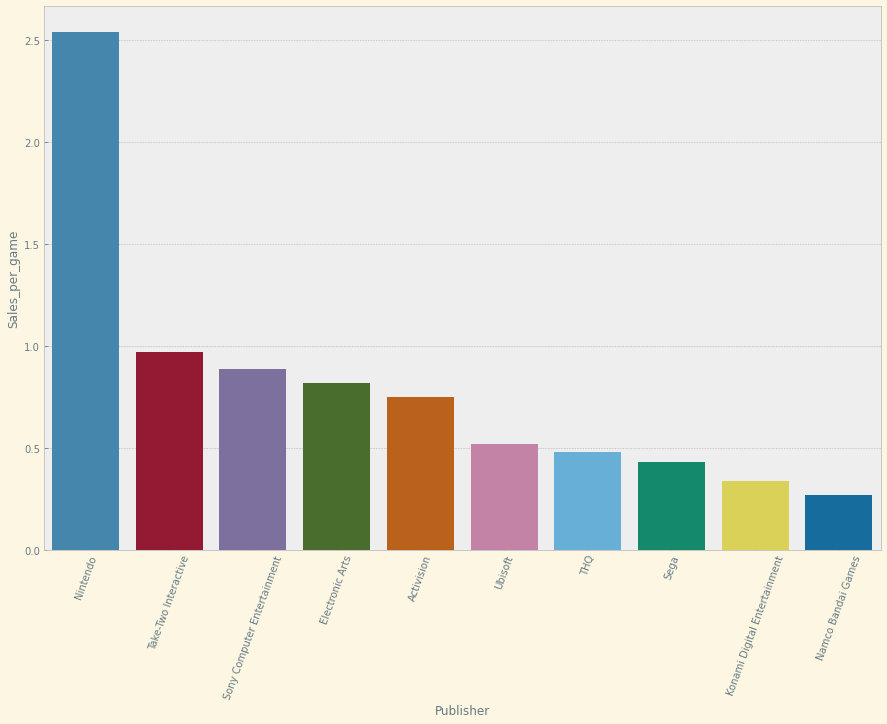

In [44]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Publisher', y='Sales_per_game', data=publishers_2.sort_values('Sales_per_game', ascending=False))
plt.xticks(rotation=70)
plt.show()

Все разработчики, за исключением Nintendo, сгруппированы в одной области, распределение их объемов продаж в зависимости от количества созданных игр линейно, Nintendo же сильно выбивается из общего ряда

взглянем на распределение данных показателей у Nintendo  в разрезе лет разработки

In [45]:
Nintendo = df[df.Publisher == 'Nintendo'].groupby('Year').agg({'Global_Sales':'sum', 'Name': 'count'})\
                                         .set_axis(['Global_Sales', 'Count_of_games'], axis=1)

In [46]:
Nintendo['Sales_per_game'] = (Nintendo['Global_Sales'] / Nintendo['Count_of_games']).round(2)

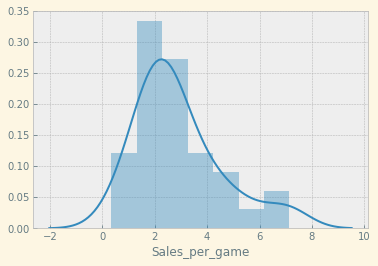

In [47]:
sns.distplot(Nintendo['Sales_per_game'])

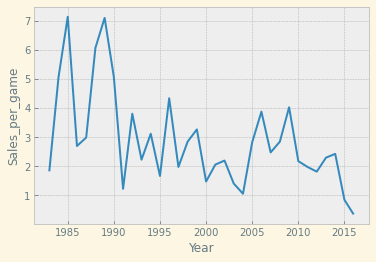

In [48]:
sns.lineplot(x=Nintendo.index, y="Sales_per_game", data=Nintendo)

График распределения параметра объемов продаж на одну игру не имеет больших выбросов и близок к нормальному с небольшим хвостом вправо, при этом по распределению показателя по годам видно, что наиольшего уровня показатель достигает до 1990 года, когда игр производилось сравнительно мало и на них в среднем приходилось больше продаж, после 1990 график усредняется и варьируется примерно между уровнями от 1 до 4 млн продаж на игру